  # Heart Failure Prediction)

## 1.1 Data Description

In [643]:
%config IPCompleter.greedy=True
# Import Libraries
import pandas as pd
import numpy as np
import missingno as msno
from sklearn import preprocessing, linear_model 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#Suppressing all warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [644]:
# Load Data and not include unnamed first column
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [645]:
# Dimensions of Training Data
data.shape

(299, 13)

In [646]:
# columns
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [647]:
# Data Description
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [648]:
# Check Dtypes
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [649]:
# First 5 rows of data (Head)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## 1.2 Data Wrangling and Preprocessing 

In [650]:
# Check for Null or missing values
data.isnull().values.any()

False

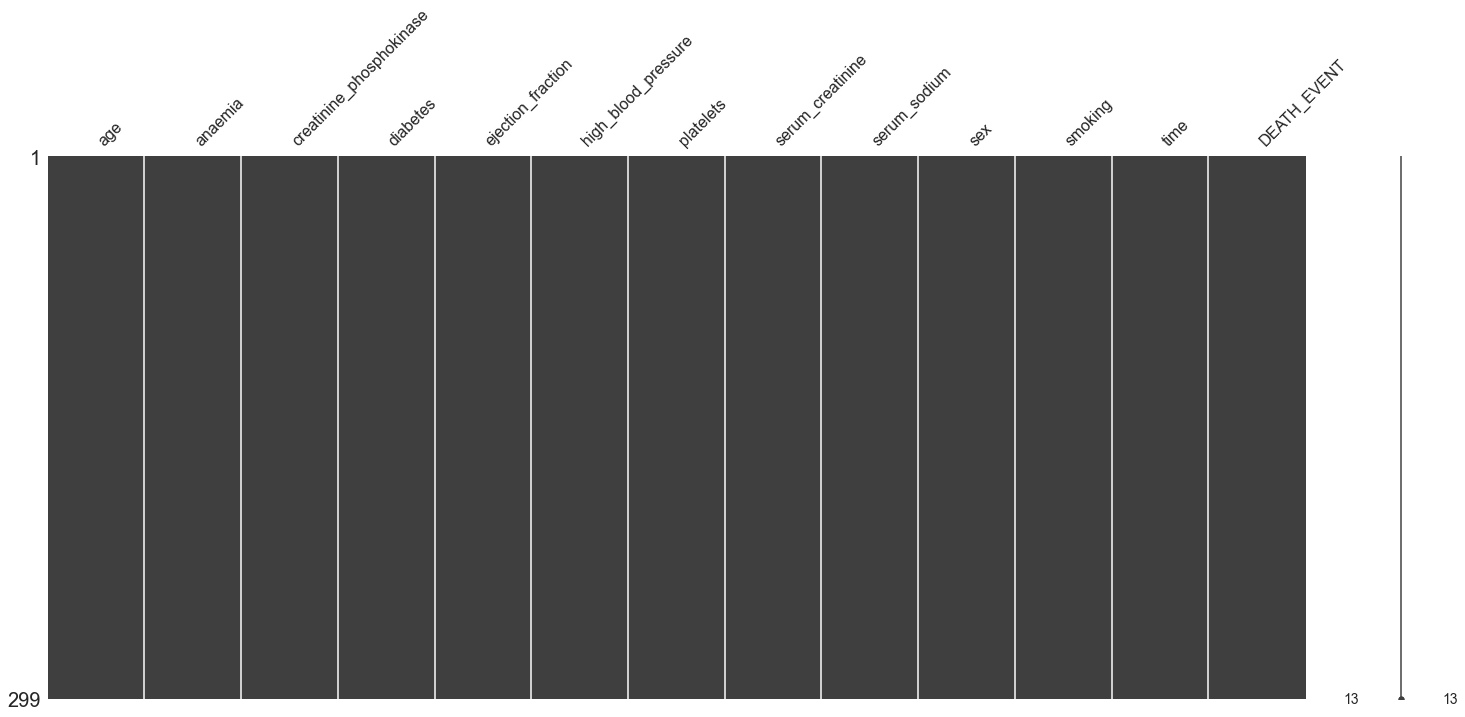

In [651]:
# plot missing vals
msno.matrix(data)

In [652]:
# Check for Null or missing values in each column (Number of missing values in each column)
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

##### Missing Values Observation
There are no missing values in any column

## 1.3 Data Analysis and Visualization

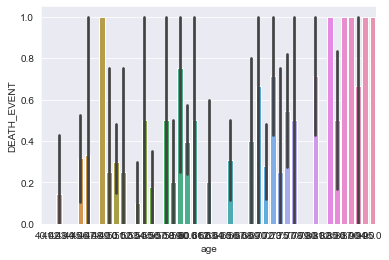

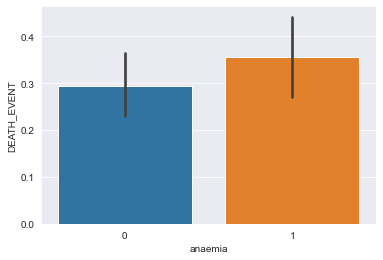

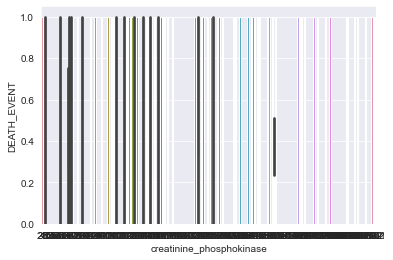

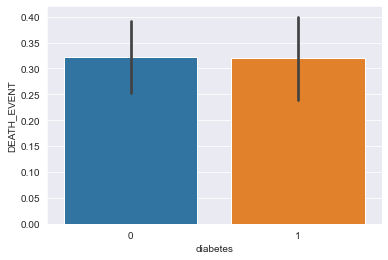

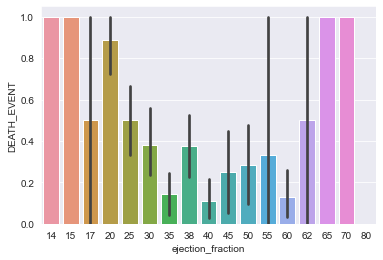

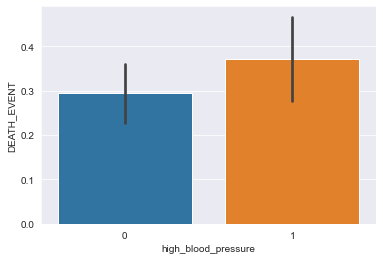

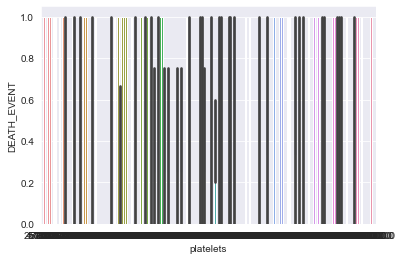

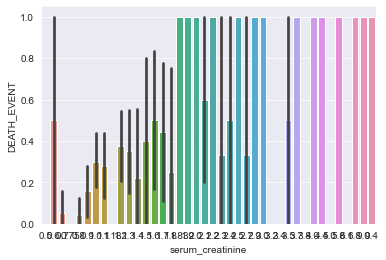

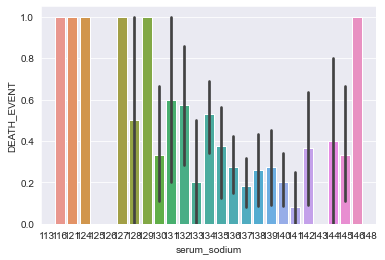

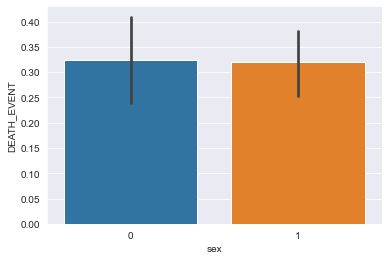

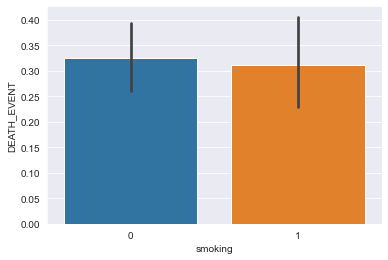

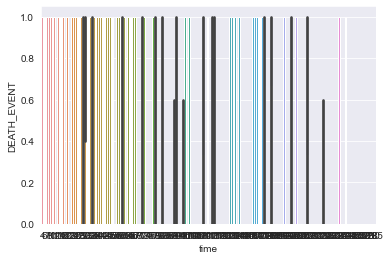

In [653]:
# Bar Plots
for i, c in enumerate(data.columns):
    if c != "DEATH_EVENT":
        plt.figure(i)
        sns.barplot(x=c, y="DEATH_EVENT", data=data) 

<Figure size 432x288 with 0 Axes>

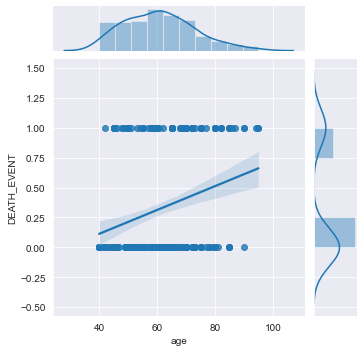

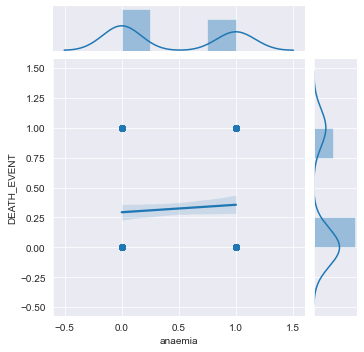

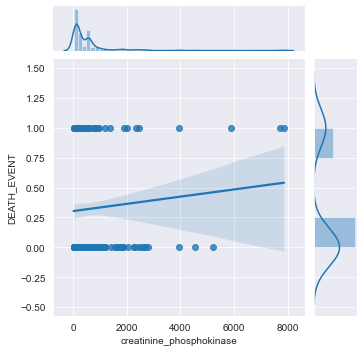

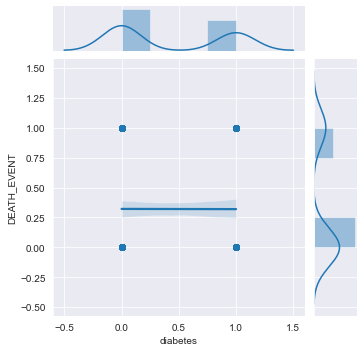

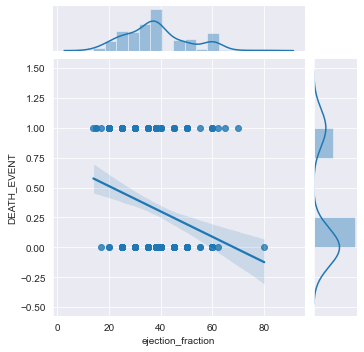

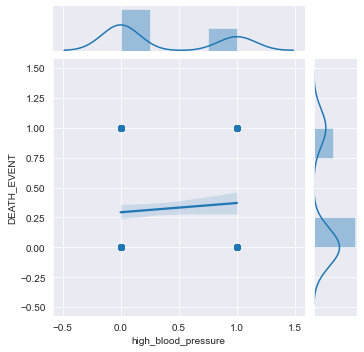

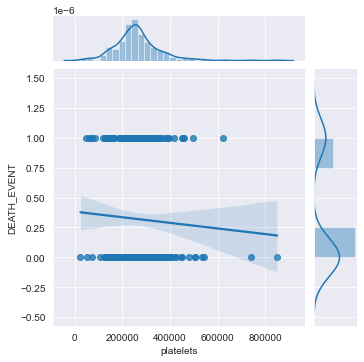

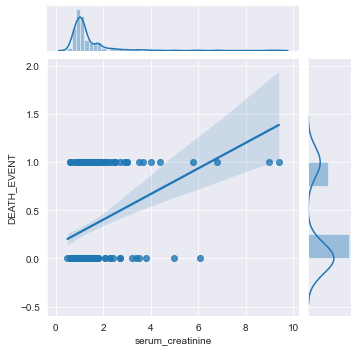

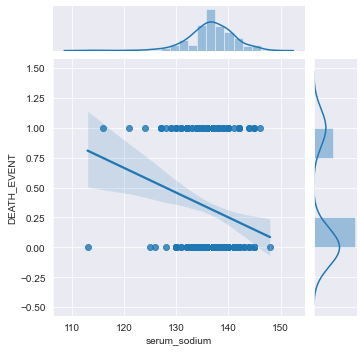

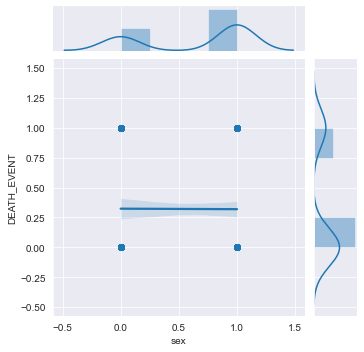

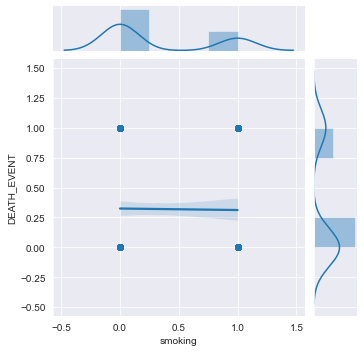

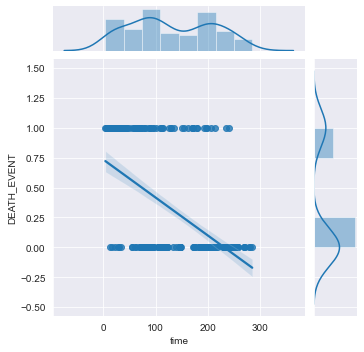

In [654]:
# Joint Plots
for i, c in enumerate(data.columns):
    if c != "DEATH_EVENT":
        plt.figure(i)
        sns.jointplot(x=c, y="DEATH_EVENT", data=data, kind='reg', height=5)

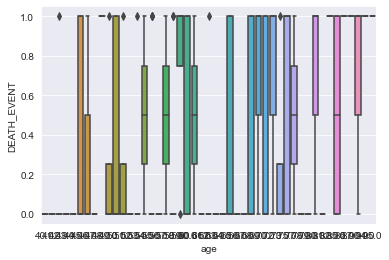

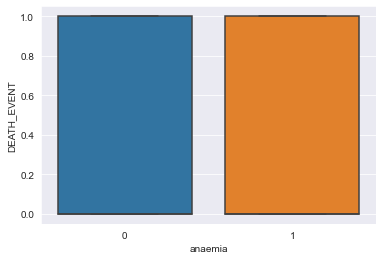

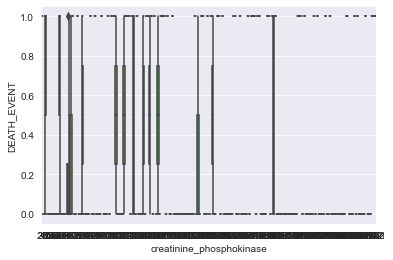

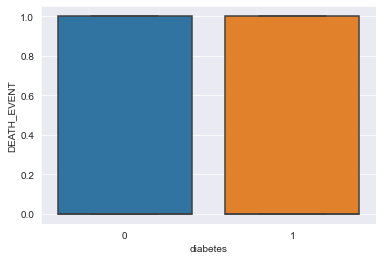

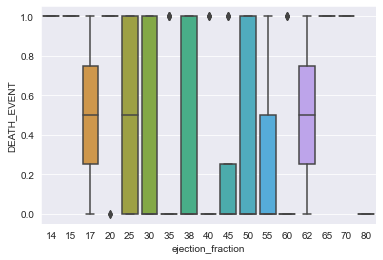

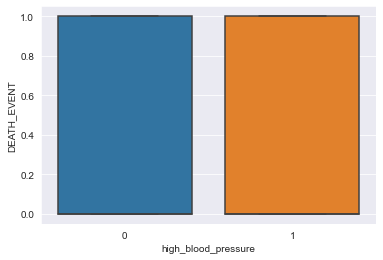

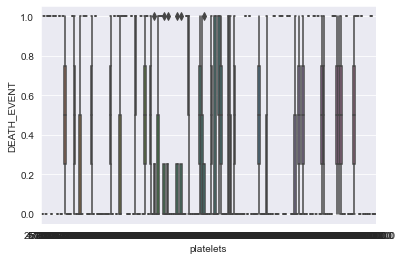

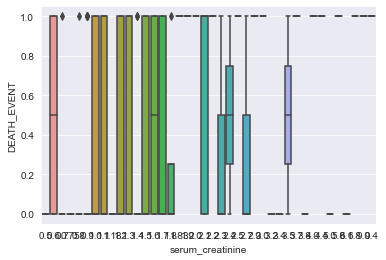

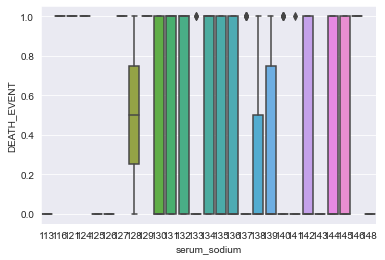

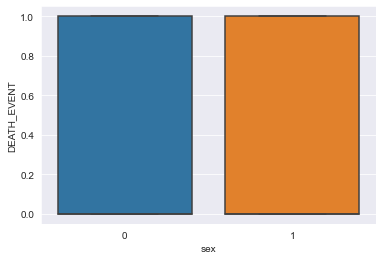

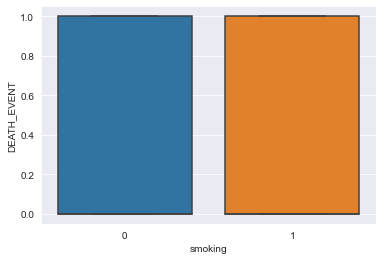

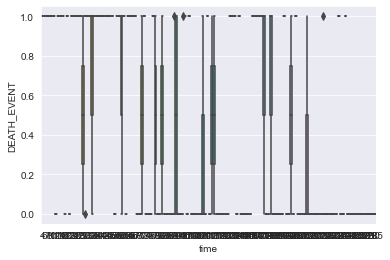

In [655]:
# Box Plots
for i, c in enumerate(data.columns):
    if c != "DEATH_EVENT":
        plt.figure(i)
        sns.boxplot(x=c, y="DEATH_EVENT", data=data)

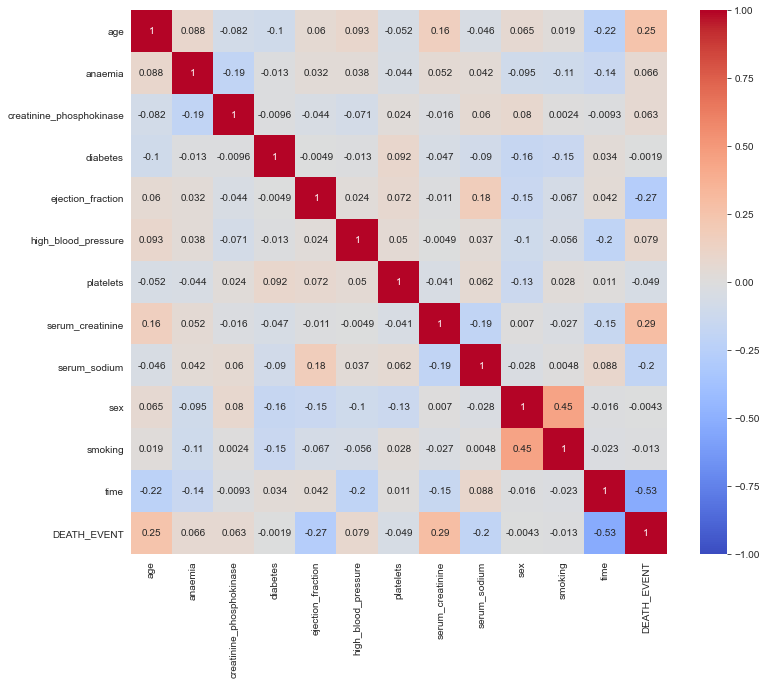

In [656]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), vmin=-1, cmap='coolwarm', annot=True) 

## 1.4 Feature Selection

In [657]:
corr =data.corr()
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

[0.08904831 0.02366607 0.07698612 0.02852987 0.13367644 0.02250605
 0.07351352 0.12017186 0.0814895  0.02810064 0.0259951  0.29631651]


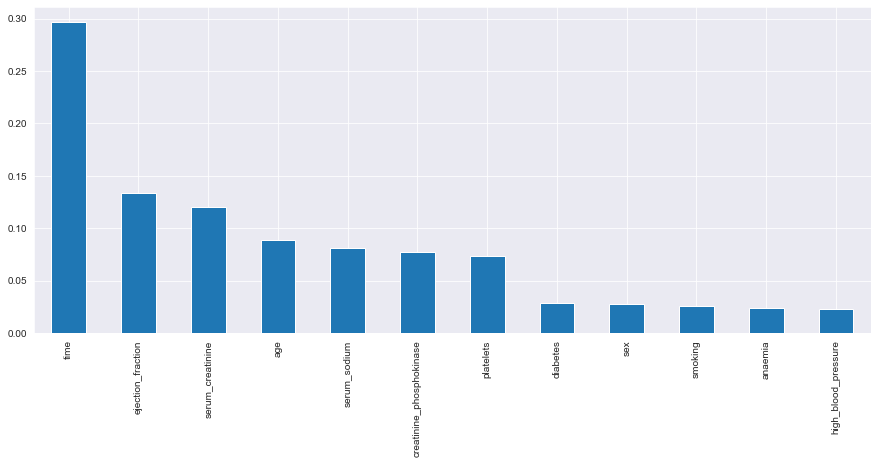

In [658]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = data.iloc[:, :-1]
y = data.iloc[:,-1]
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='bar')
plt.show()

#### Features Observation
The features `time`, `ejection_fraction`, `serum_creatinine`, `serium_sodium` and `age` have significant correlation with `DEATH_EVENT`so we will use these features.

In [659]:
# Data data will only contains columns on which we will train our model and they are most useful features
dataset=data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time', 'DEATH_EVENT']]

## 1.5 Model Training

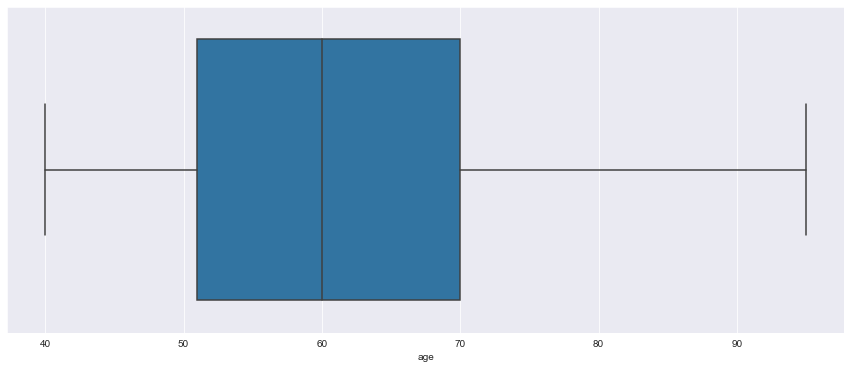

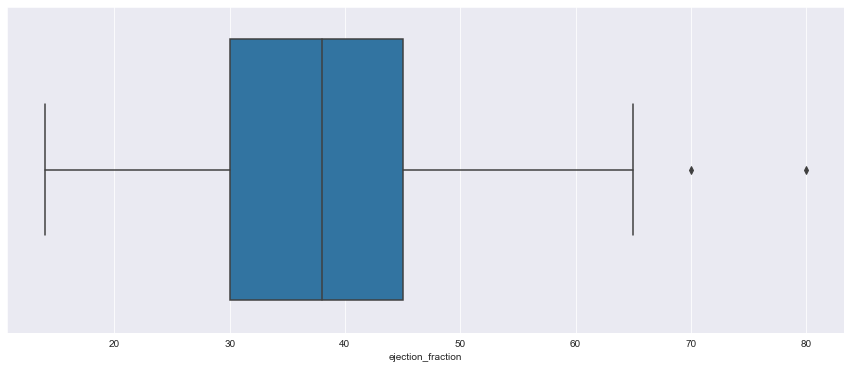

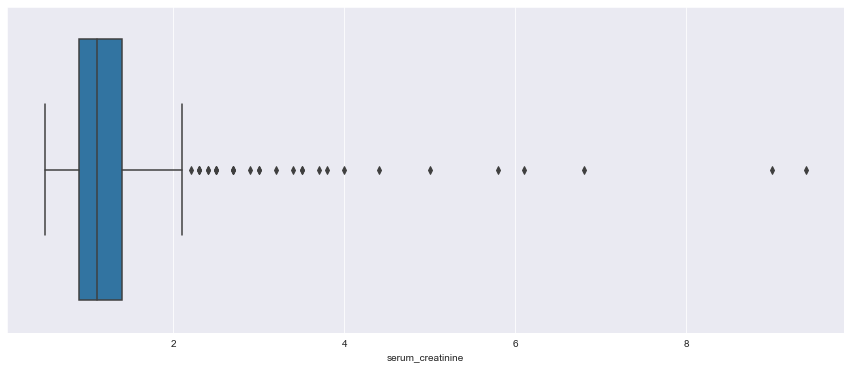

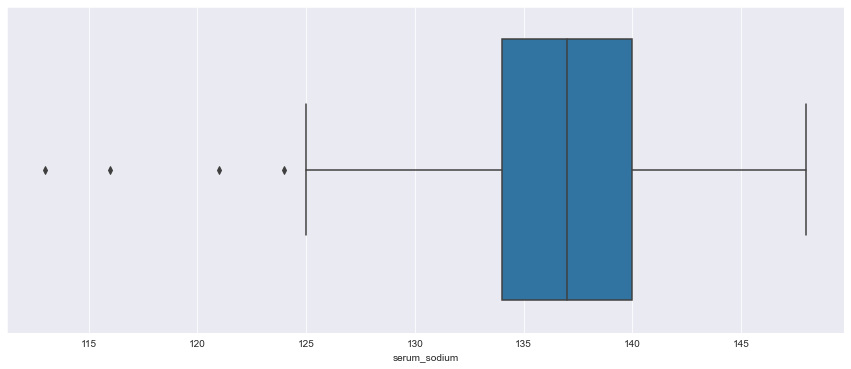

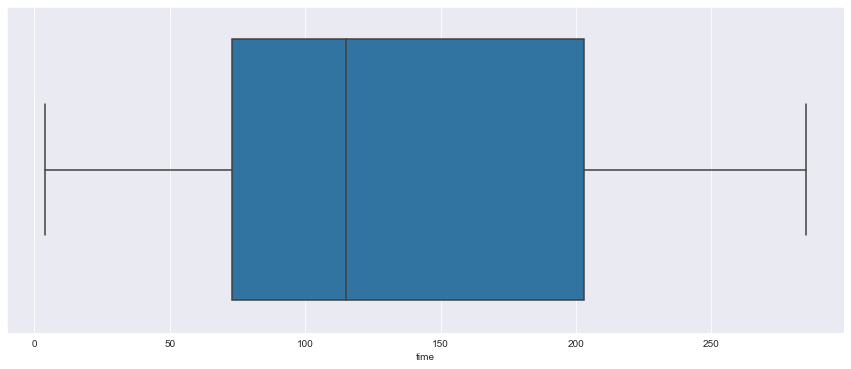

In [660]:
# Detect Outliers in our selected features
for i, c in enumerate(dataset.columns):
    if c != 'DEATH_EVENT':
        plt.figure(i)
        sns.boxplot(x=c, data=dataset)

In [661]:
# There are just two ouliers in ejection_fraction so let's remove them
dataset = dataset[dataset['ejection_fraction']<70]

In [662]:
# Split train and test data
from sklearn.model_selection import train_test_split

x = dataset.drop(columns=['DEATH_EVENT'])
y = dataset['DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)
print("Training Set Dimensions:", x_train.shape)
print("Validation Set Dimensions:", x_test.shape)

Training Set Dimensions: (237, 5)
Validation Set Dimensions: (60, 5)


In [663]:
# Standarize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Train Models

In [682]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
models_accuracies=[]
lr=LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
models_accuracies.append(accuracy_score(y_test,y_pred))

In [683]:
# Measure mean absolute error for training and validation sets for Logistic regression
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, lr.predict(x_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, lr.predict(x_test)))

Mean Absolute Error for Training Set: 0.16877637130801687
Mean Absolute Error for Test Set: 0.13333333333333333


In [684]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
randomf=RandomForestRegressor(max_depth= 10,max_features= 4,min_samples_leaf=3,min_samples_split= 8,n_estimators= 100)
randomf.fit(x_train,y_train)
y_pred=randomf.predict(x_test)
models_accuracies.append(accuracy_score(y_test,y_pred.round()))

In [685]:
# Measure mean absolute error for training and validation sets for Random ForestRegressor
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, randomf.predict(x_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, randomf.predict(x_test)))

Mean Absolute Error for Training Set: 0.149195005278773
Mean Absolute Error for Test Set: 0.20362290466886054


In [686]:
# Support Vector Machine
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
models_accuracies.append(accuracy_score(y_test,y_pred))

In [687]:
# Measure mean absolute error for training and validation sets for Support Vector Machine
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, svm.predict(x_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, svm.predict(x_test)))

Mean Absolute Error for Training Set: 0.12658227848101267
Mean Absolute Error for Test Set: 0.18333333333333332


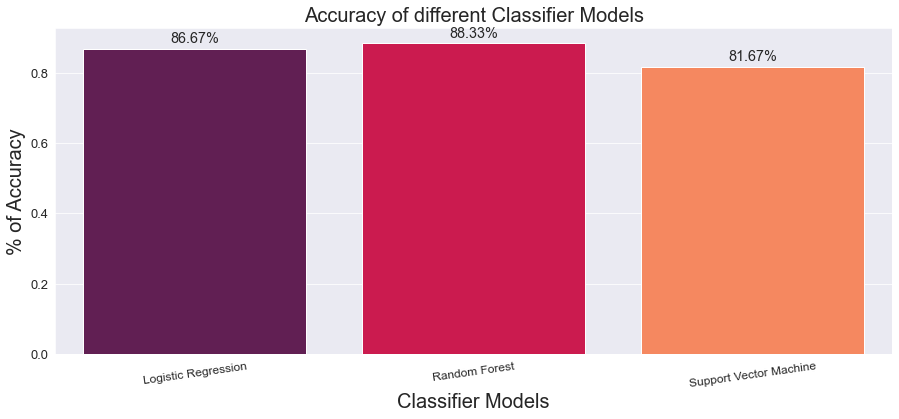

In [688]:
# Compare Results for Different Models
models = ["Logistic Regression", "Random Forest","Support Vector Machine",]
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=models_accuracies, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x_axis, y_axis = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x_axis + width/2, y_axis + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

#### Evaluate Important Features

In [671]:
# important features for Logistic Regression
coef_dict = {}
for coef, feat in zip(lr.coef_[0,:],x):
    coef_dict[feat] = coef
lr.coef_
coef_dict

{'age': 0.5780980473708167,
 'ejection_fraction': -0.9213242786548979,
 'serum_creatinine': 0.5208552831277853,
 'serum_sodium': -0.22661200310727744,
 'time': -1.2626306207457518}

feature: age = 0.10374951022566604
feature: ejection_fraction = 0.13424515731572043
feature: serum_creatinine = 0.17145579654334125
feature: serum_sodium = 0.10077749235579116
feature: time = 0.4897720435594812


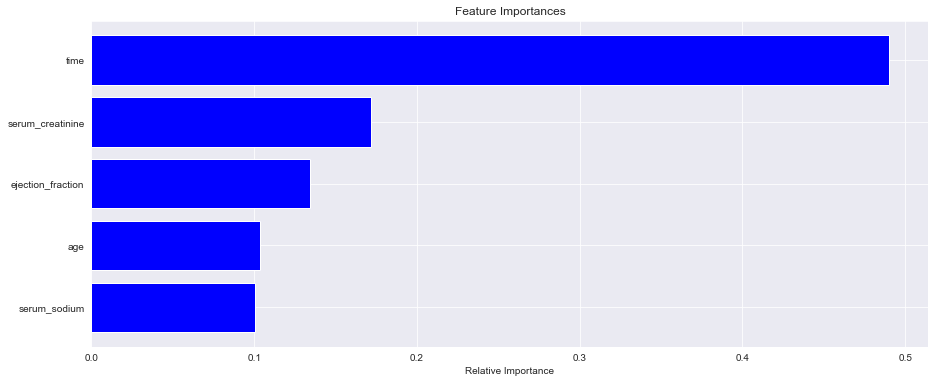

In [672]:
# important features for random forest regressor
for name, importance in zip(x.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)
    
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = x.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Important Feature Observation
`time` and ejection_fraction are the two most important features. followed by `serum_creatinine`, `age`, `serum_sodium `. 

### 1.6 Testing and Optimization

In [675]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [5, 10, 12], 
          'max_features': [2, 4, 6], 
          'min_samples_leaf': [3, 4, 5], 
          'min_samples_split': [8, 10, 12], 
          'n_estimators': [100, 200, 300]}

k = 5
score_param = 'neg_mean_absolute_error'
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring=score_param, n_jobs=-1, cv=k, verbose=True)
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  2.1min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 12], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error', verbose=True)

In [689]:
# get best model (trained on best set of params) from grid search cv
best_model = rf_grid.best_estimator_

# get best model predictions for training and validation sets
predict_train = best_model.predict(x_train)
predict_test = best_model.predict(x_test)

# print mean absolute error for predictions taken from the best model 
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, predict_train))
print('Mean Absolute Error for Validation Set:', mean_absolute_error(y_test, predict_test))
print('Best Params for random forest :', rf_grid.best_params_)

Mean Absolute Error for Training Set: 0.14682393233817284
Mean Absolute Error for Validation Set: 0.20064983095608094
Best Params for random forest : {'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}
